In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

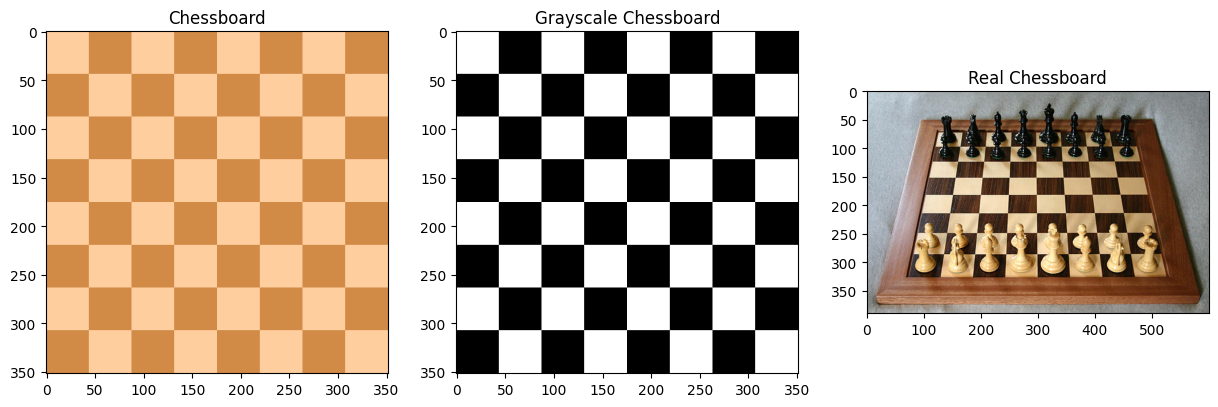

In [2]:
flat_chess = cv2.imread("../../resources/DATA/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)

real_chess = cv2.imread("../../resources/DATA/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(flat_chess)
plt.title("Chessboard")

plt.subplot(1, 3, 2)
plt.title("Grayscale Chessboard")
plt.imshow(gray_flat_chess, cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(real_chess)
plt.title("Real Chessboard")

plt.show()

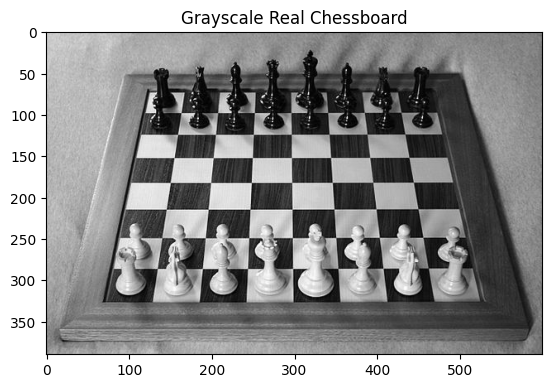

In [3]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_real_chess, cmap='gray')
plt.title("Grayscale Real Chessboard")
plt.show()

In [4]:
gray = gray_flat_chess.astype(np.float32)
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)

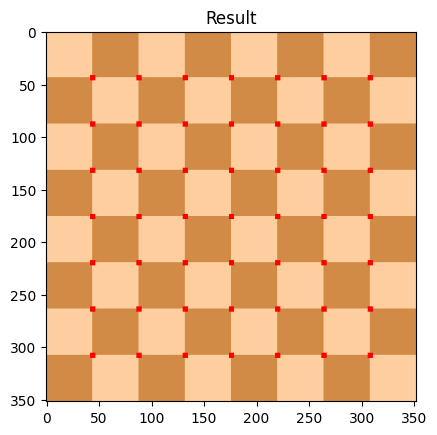

In [5]:
flat_chess[dst > 0.01 * dst.max()] = [255, 0, 0] # RGB
plt.imshow(flat_chess)
plt.title("Result")
plt.show()

In [7]:
gray = gray_real_chess.astype(np.float32)
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)

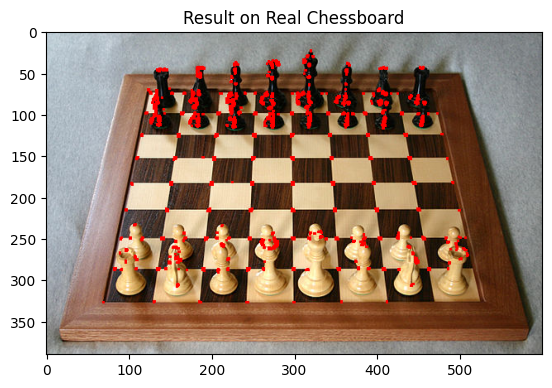

In [8]:
real_chess[dst > 0.01 * dst.max()] = [255, 0, 0] # RGB
plt.imshow(real_chess)
plt.title("Result on Real Chessboard")
plt.show()

In [9]:
flat_chess = cv2.imread("../../resources/DATA/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)

real_chess = cv2.imread("../../resources/DATA/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)

In [14]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess, maxCorners=64, qualityLevel=0.01, minDistance=10)
corners.shape

(49, 1, 2)

In [15]:
corners = np.intp(corners)
corners.shape

(49, 1, 2)

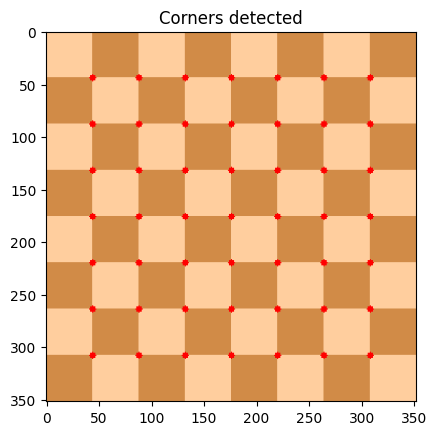

In [16]:
for i in corners:
    x,y = i.ravel()

    cv2.circle(flat_chess, center=(x, y), radius=3, color=(255, 0, 0), thickness=-1)

plt.imshow(flat_chess)
plt.title("Corners detected")
plt.show()

In [19]:
corners = cv2.goodFeaturesToTrack(gray_real_chess, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.intp(corners)
corners.shape

(100, 1, 2)

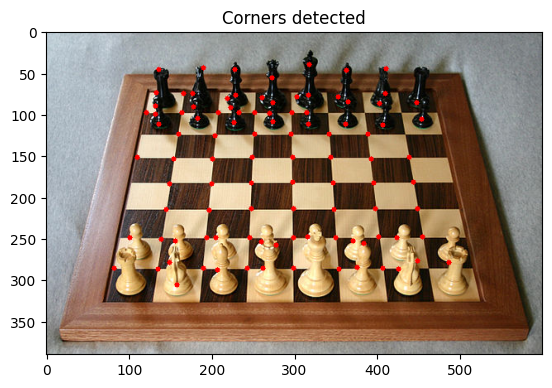

In [20]:
for i in corners:
    x,y = i.ravel()

    cv2.circle(real_chess, center=(x, y), radius=3, color=(255, 0, 0), thickness=-1)

plt.imshow(real_chess)
plt.title("Corners detected")
plt.show()